<html>
<table width="100%" cellspacing="2" cellpadding="2" border="1">
<tbody>
<tr>
<td valign="center" align="center" width="45%"><img src="../media/Univ-Utah.jpeg"><br>
</td>
    <td valign="center" align="center" width="75%">
<h1 align="center"><font size="+1">University of Utah<br>Population Health Sciences<br>Data Science Workshop</font></h1></td>
<td valign="center" align="center" width="45%"><img
src="../media/U_Health_stacked_png_red.png" alt="Utah Health
Logo" width="128" height="134"><br>
</td>
</tr>
</tbody>
</table>
<br>
</html>

In [1]:
from helpers import *
import pandas as pd

In [2]:
conn = connect_to_mimic()

Enter password for MIMIC2 database········


In [3]:
import seaborn as sns
sns.set()

# Diagnosis Data in MIMIC-II

## Standards and Terminologies
**Terminologies** are collections of concepts used to describe data. Each concept represents a single, unique item and has a unique identifier, also called a **code**. Medical data has terminologies to represent diagnoses, medications, and procedures. Furthermore, these terminologies are **standardized** so that they can be used across institutions - the same concepts used to represent a disease in one healthcare system means the same thing in another.

One example of a terminology is the [**International Disease Classification (ICD)**](https://www.who.int/standards/classifications/classification-of-diseases) system. ICD codes are used to represent patient diagnoses and are used in healthcare systems across the world. There are a few different versions of the ICD system. In the US, ICD-9 codes were used until 2015, at which point ICD-10 became the main system. Since MIMIC-II data was generated before 2015, it uses ICD-9 codes to represent patient diagnoses.

The table `icd9` contains the diagnoses assigned to patient hospitalizations. Here are the first 10 rows of `icd9`. A hospitalization can have one or more ICD-9 code and codes are ordered in importance by the `sequence` column.

In [7]:
query = """
SELECT * FROM icd9
LIMIT 10;
"""
df = pd.read_sql(query, conn)
df.head(10)

,subject_id,hadm_id,sequence,code,description
0,56,28766,1,198.3,SECONDARY MALIGNANT NEOPLASM OF BRAIN AND SPIN...
1,56,28766,2,162.8,MALIGNANT NEOPLASM OF OTHER PARTS OF BRONCHUS ...
2,56,28766,3,531.40,CHRONIC OR UNSPECIFIED GASTRIC ULCER WITH HEMO...
3,56,28766,4,276.1,HYPOSMOLALITY AND/OR HYPONATREMIA
4,56,28766,5,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED
5,56,28766,6,780.39,OTHER CONVULSIONS
6,56,28766,7,272.0,PURE HYPERCHOLESTEROLEMIA
7,56,28766,8,401.9,UNSPECIFIED ESSENTIAL HYPERTENSION
8,37,18052,1,410.71,SUBENDOCARDIAL INFARCTION INITIAL EPISODE OF CARE
9,37,18052,2,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED


### Most common codes
Let's see which codes are used most frequently in MIMIC.

#### TODO
Write a query to get the `code` and `description` columns from `icd9`, along with a column called `n` which counts how many times they appear in the table.

In [8]:
query = """
SELECT code, description, COUNT(*) n
FROM icd9
GROUP BY code, description
ORDER BY COUNT(*) DESC
"""

In [9]:
icd_counts = pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [10]:
icd_counts.head()

,code,description,n
0,401.9,UNSPECIFIED ESSENTIAL HYPERTENSION,1441
1,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED,1330
2,427.31,ATRIAL FIBRILLATION,1197
3,518.81,ACUTE RESPIRATORY FAILURE,890
4,584.9,ACUTE RENAL FAILURE UNSPECIFIED,852


#### TODO
How many *unique* diagnosis codes are there in `icd9`?

In [11]:
# RUN CELL TO SEE QUIZ
quiz_unique_icd

In [12]:
len(icd_counts)

3864

#### TODO
How many *total* diagnosis codes are there in `icd9`?

In [13]:
# RUN CELL TO SEE QUIZ
quiz_total_icd9

In [14]:
icd_counts["n"].sum()

53486

#### TODO
Create a plot showing the counts of the **10 most common** ICD-9 codes. Display the **description** on one of the axes.

In [15]:
# RUN CELL TO SEE QUIZ
hint_plot_icd9_counts

) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


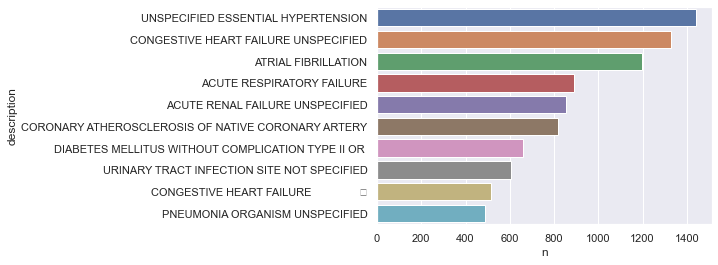

In [16]:
sns.barplot(y="description", x="n", data=icd_counts.iloc[:10]);

## Creating patient cohorts

Research projects typically create a dataset from a particular **patient cohort** which is defined some common attributes among a set of patients. This criterion will often include a particular diagnosis. For example, we might want to identify all patients who had a diagnosis 

For example, if we want to create a cohort of patients with diabetes, we could run a query like this to identify all hospitalizations with the code **250.00: Diabetes Mellitus w/o Complications Type II**:

In [38]:
query = """
SELECT *
FROM icd9
WHERE code = '250.00'
LIMIT 10
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,sequence,code,description
0,37,18052,8,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
1,21,20666,12,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
2,21,20882,13,250.00,DIABETES MELLITUS W/OUT \r
3,83,1459,8,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
4,117,4106,9,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
5,117,14296,20,250.00,DIABETES MELLITUS W/OUT \r
6,235,23806,5,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
7,184,17249,5,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
8,224,11004,4,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
9,157,28307,18,250.00,DIABETES MELLITUS W/OUT \r


### `DISTINCT` and `LIKE`
The last query gave us the first 10 rows of `icd9` which had a particular diabetes code. But there are codes which represent diabetes. Additionally, instead of identifying all hospitalizations which had this code, maybe we just want a unique list of ICD-9 codes to use as a **value set** for building datasets.

Two keywords which can help us here are `DISTINCT` and `LIKE`. The `DISTINCT` keyword deduplicates the values in your `SELECT` statement. So the code below returns all unique code/description pairs for this particular ICD-9 code:

In [20]:
query = """
SELECT DISTINCT code, description
FROM icd9
WHERE code = '250.00';
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,code,description
0,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
1,250.00,DIABETES MELLITUS W/OUT \r


The `LIKE` statement lets us do wildcard searches to match part of a text column, where `'%'` is used to represent any character. So by replacing the `WHERE` clause above to `description LIKE '%diabetes%'`, we can find all rows in the table whhere the description column contains "diabetes". Then we can use `DISTINCT` to deduplicate them.

In [22]:
query = """
SELECT DISTINCT code, description
FROM icd9
WHERE description LIKE '%diabetes%';
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,code,description
0,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...
1,250.00,DIABETES MELLITUS W/OUT \r
2,250.82,DIABETES MELLITUS WITH OTHER SPECIFIED MANIFES...
3,250.60,DIABETES MELLITUS WITH NEUROLOGICAL MANIFESTAT...
4,357.2,POLYNEUROPATHY IN DIABETES
...,...,...
68,250.10,DIABETES W/KETOACIDOSIS \r
69,250.30,"DIABETES W/OTH COMA, TYP \r"
70,250.31,DIABETES MELLITUS WITH OTHER COMA TYPE I NOT S...
71,250.03,DIABETES MELLITUS WITHOUT COMPLICATION TYPE I ...


In [83]:
query = """
SELECT code, description, COUNT(DISTINCT subject_id) n
FROM icd9
WHERE description LIKE '%diabetes%'
GROUP BY code, description
ORDER BY COUNT(DISTINCT subject_id) DESC;
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,code,description,n
0,250.00,DIABETES MELLITUS WITHOUT COMPLICATION TYPE II...,662
1,250.00,DIABETES MELLITUS W/OUT \r,162
2,250.40,DIABETES MELLITUS WITH RENAL MANIFESTATIONS TY...,102
3,357.2,POLYNEUROPATHY IN DIABETES,67
4,250.60,DIABETES MELLITUS WITH NEUROLOGICAL MANIFESTAT...,60
...,...,...,...
68,250.30,DIABETES MELLITUS WITH OTHER COMA TYPE II OR U...,1
69,250.03,DIABETES MELLITUS WITHOUT COMPLICATION TYPE I ...,1
70,250.30,"DIABETES W/OTH COMA, TYP \r",1
71,250.21,DIABETES W/HYPEROSMOLARI \r,1


#### TODO
Write and execute a query which returns all *unique* code/description pairs containing the word **pneumonia**. Save the result as `pna_codes`.

In [23]:
query = """
SELECT DISTINCT code, description
FROM icd9
WHERE description LIKE '%pneumonia%'
"""
pna_codes = pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [25]:
pna_codes.head()

,code,description
0,486,PNEUMONIA ORGANISM UNSPECIFIED
1,486,"PNEUMONIA, ORGANISM NOS \r"
2,482.41,PNEUMONIA STAPHYLOC AURE \r
3,482.89,PNEUMONIA DUE TO OTHER SPECIFIED BACTERIA
4,482.0,PNEUMONIA DUE TO KLEBSIELLA PNEUMONIAE


In [26]:
len(pna_codes)

36

In [32]:
def test_pna_codes_validation_func(actual):
    import pandas as pd
    if not isinstance(actual, pd.DataFrame):
        print(f"Incorrect. pna_codes should be a pandas DataFrame, not {type(actual)}")
        return
    if len(actual) != 36:
        print(f"Incorrect. pna_codes should have 36 rows. Your dataframe had {len(actual)}.")
        return
    if len(actual.columns) != 2 or {"code", "description"}.intersection(set(actual.columns)) != {"code", "description"}:
        print(
            f"Incorrect. pna_codes should have exactly 2 columns: 'code' and 'description'. Your dataframe has columns {list(actual.columns)}")
        return
    if {"486", "482.41"}.difference(set(actual["code"])):
        print(
            f"Incorrect. pna_codes should include codes '486' and '482.41'. Your dataframe has columns {list(actual.columns)}")
        return
    print("That is correct!")
test_pna_codes = ValueTest(validation_func=test_pna_codes_validation_func)

In [34]:
test_pna_codes.test(pna_codes)

That is correct!


## Patient characteristics
Now that we know how to identify particular diagnoses, let's next study the characteristics of patients with those diagnoses.

The `icd9` column contains two columns which can be used to join to the tables `d_patients` and `demographic_detail`.

In [41]:
# RUN CELL TO SEE QUIZ
quiz_icd9_join_d_patients

In [44]:
# RUN CELL TO SEE QUIZ
quiz_icd9_join_demographic_detail

### `COUNT(DISTINCT ...)`
`icd9` and `demographic_detail` are both at the **hospitalization** level, meaning each row represents a unique hospitalization, while `d_patients` is at the **patient** level. That means that selecting  `COUNT(*)` from `demographic_detail` or `icd9` will give us a count of of hospitalizations, not patients.

One way we could count the number of patients is by selecting `COUNT(DISTINCT subject_id)`. This first deduplicates the results by `subject_id`, then returns a count of the deduplicated set of patients.

Let's say we want to count the total number of patients who have had diabetes during any of their hospitalizations. We could write the following query:

In [45]:
query = """
SELECT COUNT(DISTINCT subject_id) n
FROM icd9
WHERE description LIKE '%diabetes%'
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,n
0,1087


In [4]:
# RUN CELL TO SEE QUIZ
quiz_count_distinct

We can also use `COUNT(DISTINCT ...)` with `GROUP BY` queries to count the number of distinct values in each group. For example, the query below counts the number of distinct patients in each ethnic group who had a code for diabetes:

In [5]:
query = """
SELECT 
    e.ethnicity_descr, COUNT(DISTINCT i.subject_id) n
FROM icd9 i
    INNER JOIN demographic_detail e
        ON i.hadm_id = e.hadm_id
WHERE description LIKE '%diabetes%'
GROUP BY e.ethnicity_descr
ORDER BY n DESC
"""

pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,ethnicity_descr,n
0,WHITE,707
1,UNKNOWN/NOT SPECIFIED,176
2,BLACK/AFRICAN AMERICAN,129
3,HISPANIC OR LATINO,25
4,OTHER,17
5,ASIAN,11
6,UNABLE TO OBTAIN,9
7,PATIENT DECLINED TO ANSWER,8
8,AMERICAN INDIAN/ALASKA NATIVE,2
9,BLACK/HAITIAN,1


#### TODO
Count the number of *unique* patients by sex who had a code containing **"pneumonia"**.

In [6]:
query = """
SELECT
    sex,
    COUNT(DISTINCT i.subject_id) n
FROM icd9 i
    INNER JOIN d_patients d
        ON i.subject_id = d.subject_id
WHERE description LIKE '%pneumonia%'
GROUP BY sex
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,sex,n
0,None,2
1,F,430
2,M,484


In [9]:
# RUN CELL TO SEE QUIZ
quiz_count_pna_by_sex

## Comorbidities
We're often interested in knowing about the **"comorbidity"** of a disease. A comorbidity is a condition which a patient has in addition to another condition. For example, if a patient has diabetes and they are also diagnosed with hypertension, then these two conditions would be comorbid. 

This is useful if we want to understand what conditions a population of patients might be at risk for based on the conditions they already have, or for measuring how certain diseases interact.

In this exercise we will identify what co-morbidities patients have. But first, let's look at one more SQL technique called **subqueries**.

### Subqueries
A **subquery** is a nested query within a larger query. Subqueries appear in the `FROM` clause, are surrounded by parentheses, and need to have an alias:
```sql
SELECT * FROM (
    SELECT 
    FROM table
) AS sub
```

Instead of directly querying a table, this selects from the subquery. This can be useful if we want to reduce the results of one table before joining with another.

For example, the following query first identifies unique patients who have a diabetes code, then joins with `d_patients`:

In [10]:
query = """
SELECT p.*
FROM (
    SELECT DISTINCT subject_id 
    FROM icd9
    WHERE description LIKE '%diabetes%'
) sub
    INNER JOIN d_patients p
        ON sub.subject_id = p.subject_id
LIMIT 10
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,sex,dob,dod,hospital_expire_flg
0,21,M,3051-05-22 00:00:00,3139-03-28 00:00:00,Y
1,37,M,3195-09-11 00:00:00,3265-12-31 00:00:00,N
2,83,F,3358-09-05 00:00:00,3424-11-09 00:00:00,N
3,117,F,3082-01-10 00:00:00,3131-12-15 00:00:00,Y
4,157,M,3047-12-08 00:00:00,3128-08-29 00:00:00,N
5,184,M,3194-10-21 00:00:00,3251-12-08 00:00:00,N
6,224,M,2954-12-12 00:00:00,3026-08-10 00:00:00,N
7,235,M,2792-05-20 00:00:00,2870-09-20 00:00:00,N
8,261,M,3121-07-18 00:00:00,3198-06-11 00:00:00,N
9,286,F,2996-12-12 00:00:00,3082-04-15 00:00:00,N


Let's see how this can help us identify comorbidities. 

In the query below, the subquery first identifies patients who have the diabetes code `250.00`. Then we join that set of patients with the `icd9` table to get all other codes for those patients. We'll also filter out 250.00 codes in the larger query, since we already know that those patients have this code:

In [25]:
query = """
SELECT 
    i.*
FROM 
    icd9 i
    INNER JOIN 
        /** Write the subquery here to get the subject_ids*/
        (
            SELECT DISTINCT
            subject_id
            FROM icd9
            WHERE description LIKE '%diabetes%'
        ) AS sub
    ON i.subject_id = sub.subject_id
WHERE i.description NOT LIKE '%diabetes%' -- filter out rows with 'diabetes'
LIMIT 10
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,subject_id,hadm_id,sequence,code,description
0,21,20666,1,410.71,SUBENDOCARDIAL INFARCTION INITIAL EPISODE OF CARE
1,21,20666,2,785.51,CARDIOGENIC SHOCK
2,21,20666,3,578.1,BLOOD IN STOOL
3,21,20666,4,584.9,ACUTE RENAL FAILURE UNSPECIFIED
4,21,20666,5,403.91,UNSPECIFIED HYPERTENSIVE RENAL DISEASE WITH RE...
5,21,20666,6,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED
6,21,20666,7,459.2,COMPRESSION OF VEIN
7,21,20666,8,507.0,PNEUMONITIS DUE TO INHALATION OF FOOD OR VOMITUS
8,21,20666,9,427.31,ATRIAL FIBRILLATION
9,21,20666,10,427.1,PAROXYSMAL VENTRICULAR TACHYCARDIA


The next query then counts the number of *unique* patients who have each co-morbidity and returns the 10 most common comorbidities.

In [24]:
query = """
SELECT 
    code,
    description,
    COUNT(DISTINCT i.subject_id) n
FROM 
    icd9 i
    INNER JOIN 
        /** Write the subquery here to get the subject_ids*/
        (
            SELECT DISTINCT
            subject_id
            FROM icd9
            WHERE description LIKE '%diabetes%'
        ) AS sub
    ON i.subject_id = sub.subject_id
WHERE i.description NOT LIKE '%diabetes%' -- filter out rows with 'diabetes'
GROUP BY code, description
ORDER BY COUNT(DISTINCT i.subject_id) desc
LIMIT 10
"""
pd.read_sql(query, conn)

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,code,description,n
0,401.9,UNSPECIFIED ESSENTIAL HYPERTENSION,460
1,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED,452
2,427.31,ATRIAL FIBRILLATION,338
3,414.01,CORONARY ATHEROSCLEROSIS OF NATIVE CORONARY AR...,324
4,584.9,ACUTE RENAL FAILURE UNSPECIFIED,263
5,518.81,ACUTE RESPIRATORY FAILURE,216
6,599.0,URINARY TRACT INFECTION SITE NOT SPECIFIED,174
7,428.0,CONGESTIVE HEART FAILURE \r,167
8,403.91,UNSPECIFIED HYPERTENSIVE RENAL DISEASE WITH RE...,152
9,272.0,PURE HYPERCHOLESTEROLEMIA,146


#### TODO
Write a query which contains the 10 most common co-morbidities for patients with pneumonia. Save the results as `pna_cmrbd`. Make sure to count distinct patients.

In [35]:
query = """
SELECT 
    code,
    description,
    COUNT(DISTINCT i.subject_id) n
FROM 
    icd9 i
    INNER JOIN 
        /** Write the subquery here to get the subject_ids*/
        (
            SELECT DISTINCT
            subject_id
            FROM icd9
            WHERE description LIKE '%pneumonia%'
        ) AS sub
    ON i.subject_id = sub.subject_id
WHERE description NOT LIKE '%pneumonia%' -- filter out rows with 'pneumonia'
GROUP BY code, description
ORDER BY COUNT(DISTINCT i.subject_id) desc
LIMIT 10
"""
pna_cmrbd = pd.read_sql(query, conn)
pna_cmrbd

/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,code,description,n
0,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED,377
1,518.81,ACUTE RESPIRATORY FAILURE,359
2,427.31,ATRIAL FIBRILLATION,303
3,401.9,UNSPECIFIED ESSENTIAL HYPERTENSION,283
4,584.9,ACUTE RENAL FAILURE UNSPECIFIED,268
5,428.0,CONGESTIVE HEART FAILURE \r,168
6,599.0,URINARY TRACT INFECTION SITE NOT SPECIFIED,160
7,038.9,UNSPECIFIED SEPTICEMIA,155
8,995.92,SYSTEMIC INFLAMMATORY RESPONSE SYNDROME DUE TO...,149
9,414.01,CORONARY ATHEROSCLEROSIS OF NATIVE CORONARY AR...,145


In [30]:
MultipleChoiceQuiz("What is the most common co-morbidity for patients with pneumonia codes? How many patients have that code?",
                  answer="CONGESTIVE HEART FAILURE UNSPECIFIED; 377",
                  options=["ATRIAL FIBRILLATION; 303", "CONGESTIVE HEART FAILURE UNSPECIFIED; 359", "ACUTE RESPIRATORY FAILURE; 359"])

#### Advanced
Can you add a column `prop` to the table above which is the **proportion** of all patients with pneumonia who have a co-morbid condition?

In [34]:
query = """
SELECT COUNT(DISTINCT subject_id) n
FROM icd9
WHERE description LIKE '%pneumonia%'
"""
total_pna_counts = pd.read_sql(query, conn).iloc[0]["n"]
print(total_pna_counts)

pna_cmrbd["prop"] = pna_cmrbd["n"] / total_pna_counts
pna_cmrbd.head()

916


/Users/alecchapman/opt/miniconda3/envs/phs/lib/python3.9/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,code,description,n,prop
0,428.0,CONGESTIVE HEART FAILURE UNSPECIFIED,377,0.411572
1,518.81,ACUTE RESPIRATORY FAILURE,359,0.391921
2,427.31,ATRIAL FIBRILLATION,303,0.330786
3,401.9,UNSPECIFIED ESSENTIAL HYPERTENSION,283,0.308952
4,584.9,ACUTE RENAL FAILURE UNSPECIFIED,268,0.292576
